#       TASK : SALES PREDICTION USING PYTHON

    Author:Ranjit Debnath
    
    Batch:May-June
    
    Domain:Data Science
    
    Aim:- Sales prdiction involves predicting the amount of a product that a customer will purchase, taking into account                 several factors such as advertising expenditure and advertising platform selection


IMPORTING IMPORTANT LIBRARIES

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

IMPORTING DATASET

In [162]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


The given dataset consist of the expenditure on the advertising platforms and the related sales

In [163]:
df.shape

(200, 4)

In [164]:
df.size

800

In [165]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [167]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


 Some Basic observations


Advertising expense spend is highest on TV

Advertising expense spend is lowest on Radio

Maximum sale is 27 and Minimum sale is 1.6

# Analyzing Data Graphically

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


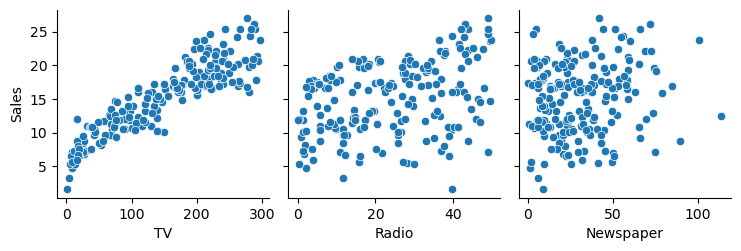

In [168]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=df)

From the above Pair plot we come to a conclusion that

When advertising cost increases in TV Ads the sales will also increase ,but for Radio and Newspaper it is bit unpredictable

Text(0.5, 1.0, 'Histogram')

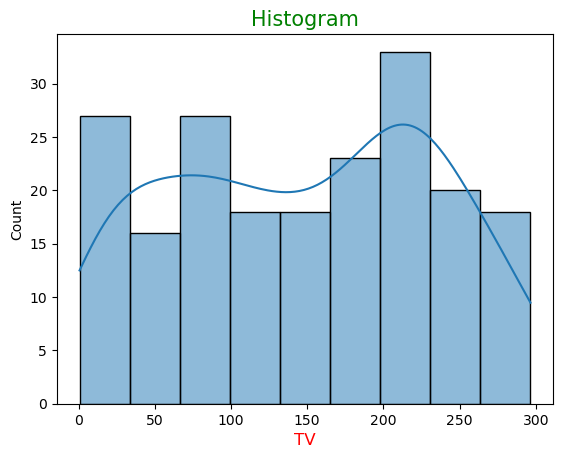

In [169]:
sns.histplot(x='TV',data=df,kde=True,)
plt.xlabel('TV',color='r',size=12)
plt.title('Histogram',color='g',size=15)

Text(0.5, 1.0, 'Histogram')

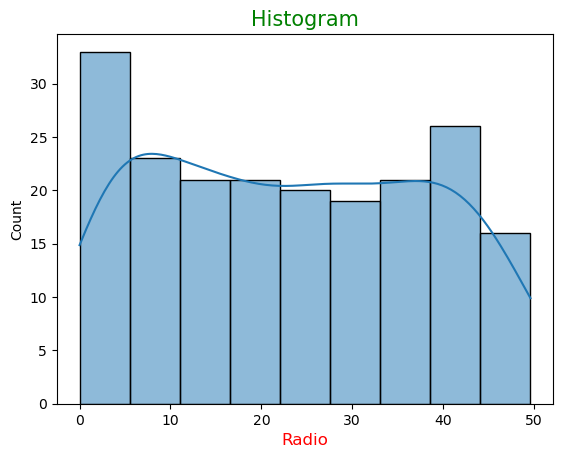

In [170]:
sns.histplot(x='Radio',data=df,kde=True)
plt.xlabel('Radio',color='r',size=12)
plt.title('Histogram',color='g',size=15)

Text(0.5, 1.0, 'Histogram')

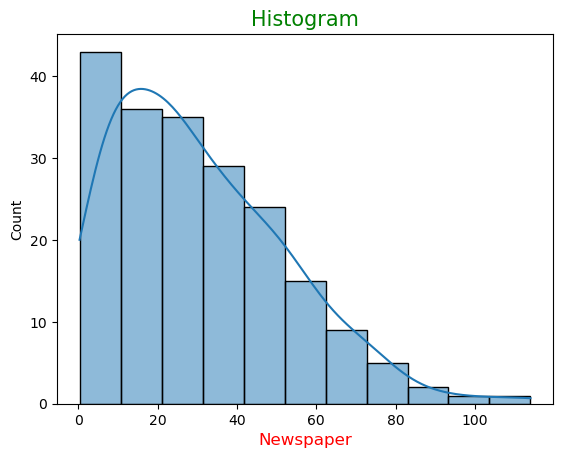

In [171]:
sns.histplot(x='Newspaper',data=df,kde=True)
plt.xlabel('Newspaper',color='r',size=12)
plt.title('Histogram',color='g',size=15)

Text(0.5, 1.0, 'Histogram')

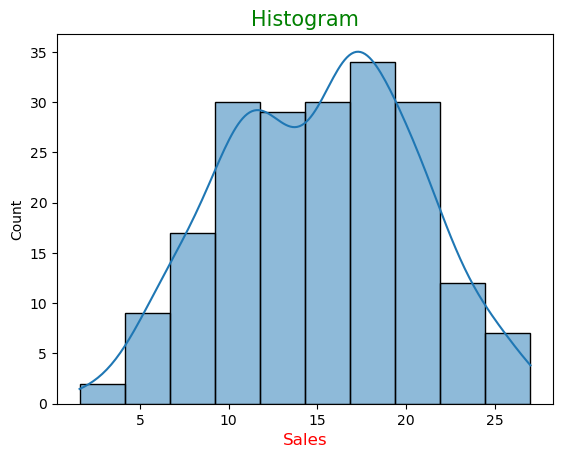

In [172]:
sns.histplot(x='Sales',data=df,kde=True)
plt.xlabel('Sales',color='r',size=12)
plt.title('Histogram',color='g',size=15)

Text(0.5, 1.0, 'Scatter plot')

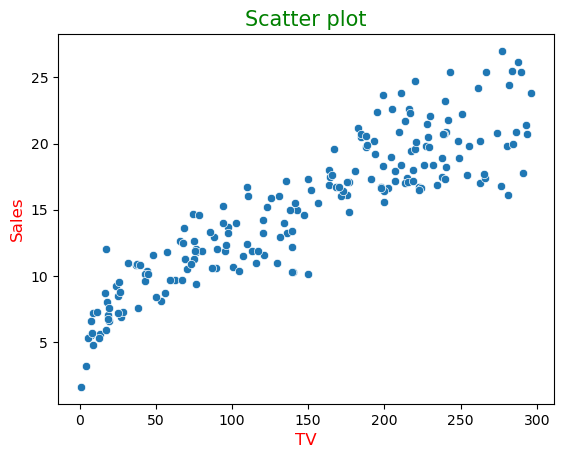

In [173]:
sns.scatterplot(x='TV',y='Sales',data=df)
plt.xlabel('TV',color='r',size=12)
plt.ylabel('Sales',color='r',size=12)
plt.title('Scatter plot',color='g',size=15)

SALES IS DIRECTLY RELATED WITH THE TV

Lets train our model using Linear Regression as it is related with only one variable TV

In [174]:
x=df[['TV']]
y=df[['Sales']]

Splitting the dataset for training and testing

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [176]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [177]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [178]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


Linear Regression

In [179]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [180]:
# x_train=np.array(x_train).reshape(-1,1)
# y_train=np.array(y_train).reshape(-1,1)

In [181]:
reg.fit(x_train,y_train) 

LinearRegression()

In [182]:
y_pred=reg.predict(x_test)

In [183]:
print(y_pred)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [184]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


In [185]:
m=reg.coef_
m

array([[0.05473199]])

In [186]:
c=reg.intercept_
c

array([7.14382225])

In [187]:
m*69.2+c #Predicted value

array([[10.93127621]])

Text(0.5, 1.0, 'Best Fit Line')

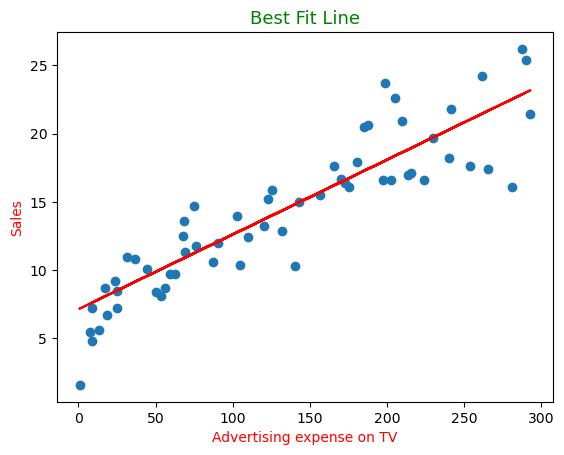

In [188]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.xlabel('Advertising expense on TV',color='r')
plt.ylabel('Sales',color='r')
plt.title('Best Fit Line',color='g',size=13)

In [189]:
from sklearn.metrics import r2_score,mean_absolute_error
error=mean_absolute_error(y_test,y_pred)
print('The Mean absolute Error is:',error)

The Mean absolute Error is: 1.8639438916550553


In [190]:
score=r2_score(y_test,y_pred)
print('The accuracy score is:',score)

The accuracy score is: 0.8150168765722069


# THE END